#Importing Libraries and CSV

# ----------------------------------------------------

# --- TASK 1 ---

In [74]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [75]:
df = pd.read_csv('/content/Keyword_data - Keyword_data (1).csv', index_col='Index')
df = df.apply(lambda x: x.astype(str).str.upper())

In [76]:
len(df)
df1 = pd.DataFrame(columns = ['Date','Title','node_x','node_y','weight'])


#Data Munging

In [77]:
for index,row in df.iterrows():
  df_temp = pd.DataFrame(columns = ['Date','Title','node_x','node_y','weight'])
  df_1 = df.iloc[[index-1]]
  df_1 = df_1.set_index(['Date',	'Title'	]).stack().reset_index(level=2, drop=True).reset_index(name='node')
  df_1 = df_1[df_1.node != 'NAN']
  df_1 = df_1.merge(df_1['node'], how='cross')
  df_1 = df_1[df_1['node_x'] != df_1['node_y']]
  df_temp = df_temp.append(df_1)
  df_temp['check_string'] = df_temp.apply(lambda row: ''.join(sorted([row['node_x'], row['node_y']])), axis=1)
  df_temp.drop_duplicates(subset=['check_string'], inplace=True)
  df_temp['weight'] = 1
  df1 = df1.append(df_temp)



In [78]:
df1.head(15)

,Date,Title,node_x,node_y,weight,check_string
1,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,ORGANIZATIONAL SOCIOLOGY,1,EQUITYORGANIZATIONAL SOCIOLOGY
2,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,PERFORMANCE,1,EQUITYPERFORMANCE
3,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,META-ANALYSIS,1,EQUITYMETA-ANALYSIS
4,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,PSYCHOMETRICS,1,EQUITYPSYCHOMETRICS
5,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,ORGANIZATIONAL RESEARCH,1,EQUITYORGANIZATIONAL RESEARCH
6,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,FINANCIAL PERFORMANCE,1,EQUITYFINANCIAL PERFORMANCE
7,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,AGENCY THEORY,1,AGENCY THEORYEQUITY
8,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,ORGANIZATIONAL EFFECTIVENESS,1,EQUITYORGANIZATIONAL EFFECTIVENESS
9,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,ORGANIZATIONAL BEHAVIOR,1,EQUITYORGANIZATIONAL BEHAVIOR
10,FEB-03,META-ANALYSES OF FINANCIAL PERFORMANCE AND EQU...,EQUITY,CORPORATE GOVERNANCE,1,CORPORATE GOVERNANCEEQUITY


In [79]:
len(df1)


2439

In [80]:
df2=df1.groupby(['node_x','node_y']).size().reset_index().rename(columns={0:'weight'})


In [81]:
df2['check_string'] = df2.apply(lambda row: ''.join(sorted([row['node_x'], row['node_y']])), axis=1)

In [82]:
df_weight = df2[['check_string', 'weight']]
df_weight = df_weight.groupby(['check_string']).sum()
df_weight = df_weight.rename(columns={'weight': 'new_weight'})

In [83]:
df2 = df2.merge(df_weight, on='check_string', how='left')

#Creating Weighted Unidrected Graph

In [84]:
#df_weight.sort_values(by=['new_weight'], ascending = False)

In [85]:
Graph1 = nx.from_pandas_edgelist(df2, 'node_x', 'node_y', 'new_weight')

#Top 10 Node by Strength

In [86]:
distinct_series = list(df1['node_y'].unique())

In [87]:
# Top 10 Strength
strength_df = pd.DataFrame(columns = ['Node', 'Strength'])
for i in distinct_series:
  Strength1 = df1[df1['node_y'] == i]['weight'].sum() + df1[df1['node_x'] == i]['weight'].sum()
  str_list = [i,Strength1]
  strength_df.loc[len(strength_df)] = str_list

strength_df.sort_values(by=['Strength'], ascending = False)
  

,Node,Strength
8,ORGANIZATIONAL BEHAVIOR,265
7,ORGANIZATIONAL EFFECTIVENESS,144
15,MANAGEMENT SCIENCE,136
29,PERSONNEL MANAGEMENT,126
39,DECISION MAKING,112
...,...,...
93,MINORITY STOCKHOLDERS,8
198,CROSS-CULTURAL DIFFERENCES,7
85,STEWARDS,7
196,TAIWANESE,7


#Top 10 Nodes by Degree

In [88]:
node_df = pd.DataFrame(columns = ['Node','Degree'])

In [89]:
for i in list(Graph1.nodes):
  degree = Graph1.degree(i)
  temp_dict = [i,degree]
  node_df.loc[len(node_df)] = temp_dict

In [90]:
node_df.sort_values(by=['Degree'], inplace = True, ascending = False)
node_df

,Node,Degree
8,ORGANIZATIONAL BEHAVIOR,166
9,ORGANIZATIONAL EFFECTIVENESS,104
21,MANAGEMENT SCIENCE,102
12,PERSONNEL MANAGEMENT,93
3,DECISION MAKING,90
...,...,...
188,EMINENT DOMAIN,8
149,CROSS-CULTURAL DIFFERENCES,7
155,TAIWANESE,7
14,STEWARDS,7


#Top 10 Node Pairs by Weight

In [91]:
weight_df = pd.DataFrame(columns = ['Node_x','Node_y', 'Weight'])
edge_list = list(Graph1.edges(data=True))

for element in edge_list:
  nodex = element[0]
  nodey = element[1]
  strength = element[2]['new_weight']
  temp_list = [nodex,nodey,strength]
  weight_df.loc[len(weight_df)] = temp_list



In [92]:
weight_df.sort_values(by=['Weight'], inplace = True, ascending = False)
weight_df.head()

,Node_x,Node_y,Weight
374,ORGANIZATIONAL BEHAVIOR,ORGANIZATIONAL EFFECTIVENESS,11
378,ORGANIZATIONAL BEHAVIOR,ORGANIZATIONAL STRUCTURE,9
380,ORGANIZATIONAL BEHAVIOR,PERSONNEL MANAGEMENT,8
339,ORGANIZATIONAL BEHAVIOR,MANAGEMENT SCIENCE,7
377,ORGANIZATIONAL BEHAVIOR,ORGANIZATIONAL SOCIOLOGY,6


#Visualization - Average Strength by Degree

In [93]:
viz = node_df.merge(strength_df, on='Node', how='left')
viz = viz.groupby(['Degree']).mean().reset_index()
viz = viz.rename(columns={'Strength': 'Average_Strength'})
viz.head(2)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Degree,Average_Strength
0,4,4.0
1,7,7.0


Text(0.5, 1.0, 'Degree Vs. Average Strength')

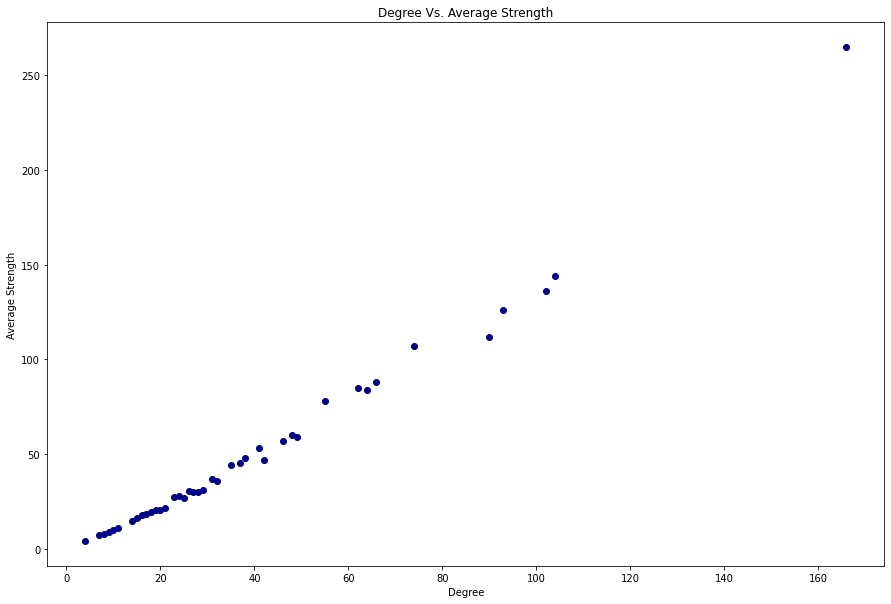

In [94]:
plt.figure(figsize=(15, 10))
plt.scatter(x=viz['Degree'], y=viz['Average_Strength'],c='DarkBlue')
plt.xlabel("Degree")
plt.ylabel("Average Strength")
plt.title("Degree Vs. Average Strength")

# --- TASK 2 ---

In [95]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from collections import defaultdict
from collections import  Counter
stop=set(stopwords.words('english'))
stopword_list=nltk.corpus.stopwords.words('english')
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from nltk import bigrams
import networkx as nx
import itertools
import collections

%matplotlib inline

# Importing Data for years between 2017-2022

In [97]:
year_2017 = pd.read_csv('/content/2017.csv', index_col= 0)
year_2018 = pd.read_csv('/content/2018.csv', index_col= 0)
year_2019 = pd.read_csv('/content/2019.csv', index_col= 0)
year_2020 = pd.read_csv('/content/2020.csv', index_col= 0)
year_2021 = pd.read_csv('/content/2021.csv', index_col= 0)
year_2022 = pd.read_csv('/content/2022.csv', index_col= 0)

# Calculating Word Frequency 

In [98]:
def word_frequency(year, top = 0):
  if year == 2017:
    data = year_2017
  elif year == 2018:
    data = year_2018
  elif year == 2019:
    data = year_2019
  elif year == 2020:
    data = year_2020
  elif year == 2021:
    data = year_2021
  elif year == 2022:
    data = year_2022
  else:
    return "Invalid Year"


  data['tweet'] = data['tweet'].apply(lambda x: re.split('http\S+|www.\S+', str(x))[0])

  a = data['tweet'].str.lower().str.cat(sep=' ')
  words = nltk.tokenize.word_tokenize(a)

  words=[word.lower() for word in words if word.isalpha()]
  word_dist = nltk.FreqDist(words)
  print (word_dist)

  rslt = pd.DataFrame(word_dist.most_common(),columns=['Word', 'Frequency'])
  rslt_nostop = rslt[~rslt.Word.isin(stopword_list)].reset_index()
  rslt_nostop["Year"] = str(year)
  rslt_nostop.drop(['index'], axis=1, inplace = True)
  if top == 0:
    return rslt_nostop
  else:
    return rslt_nostop.nlargest(top, 'Frequency')

## For all Years

### Dataframe for all rows and all years

In [99]:
word_freq = pd.DataFrame(columns = ['Word', 'Frequency','Year'])
data_list = [2017,2018,2019,2020,2021,2022]

for i in data_list:
  x = word_frequency(i)
  word_freq = word_freq.append(x)

<FreqDist with 7006 samples and 42073 outcomes>
<FreqDist with 6202 samples and 33761 outcomes>
<FreqDist with 12272 samples and 108519 outcomes>
<FreqDist with 14611 samples and 149840 outcomes>
<FreqDist with 5812 samples and 35632 outcomes>
<FreqDist with 1743 samples and 9850 outcomes>


In [100]:
word_freq

,Word,Frequency,Year
0,tesla,308,2017
1,amp,219,2017
2,model,207,2017
3,good,168,2017
4,rocket,149,2017
...,...,...,...
1623,generations,2,2022
1624,age,2,2022
1625,roaring,2,2022
1626,happen,2,2022


## Top 10 for all years

### Dataframes for Top 10

In [101]:
top_10_2017 = word_frequency(2017,top = 10)
top_10_2018 = word_frequency(2018,top = 10)
top_10_2019 = word_frequency(2019,top = 10)
top_10_2020 = word_frequency(2020,top = 10)
top_10_2021 = word_frequency(2021,top = 10)
top_10_2022 = word_frequency(2022,top = 10)

<FreqDist with 7006 samples and 42073 outcomes>
<FreqDist with 6202 samples and 33761 outcomes>
<FreqDist with 12272 samples and 108519 outcomes>
<FreqDist with 14611 samples and 149840 outcomes>
<FreqDist with 5812 samples and 35632 outcomes>
<FreqDist with 1743 samples and 9850 outcomes>


### Visualization for Top 10

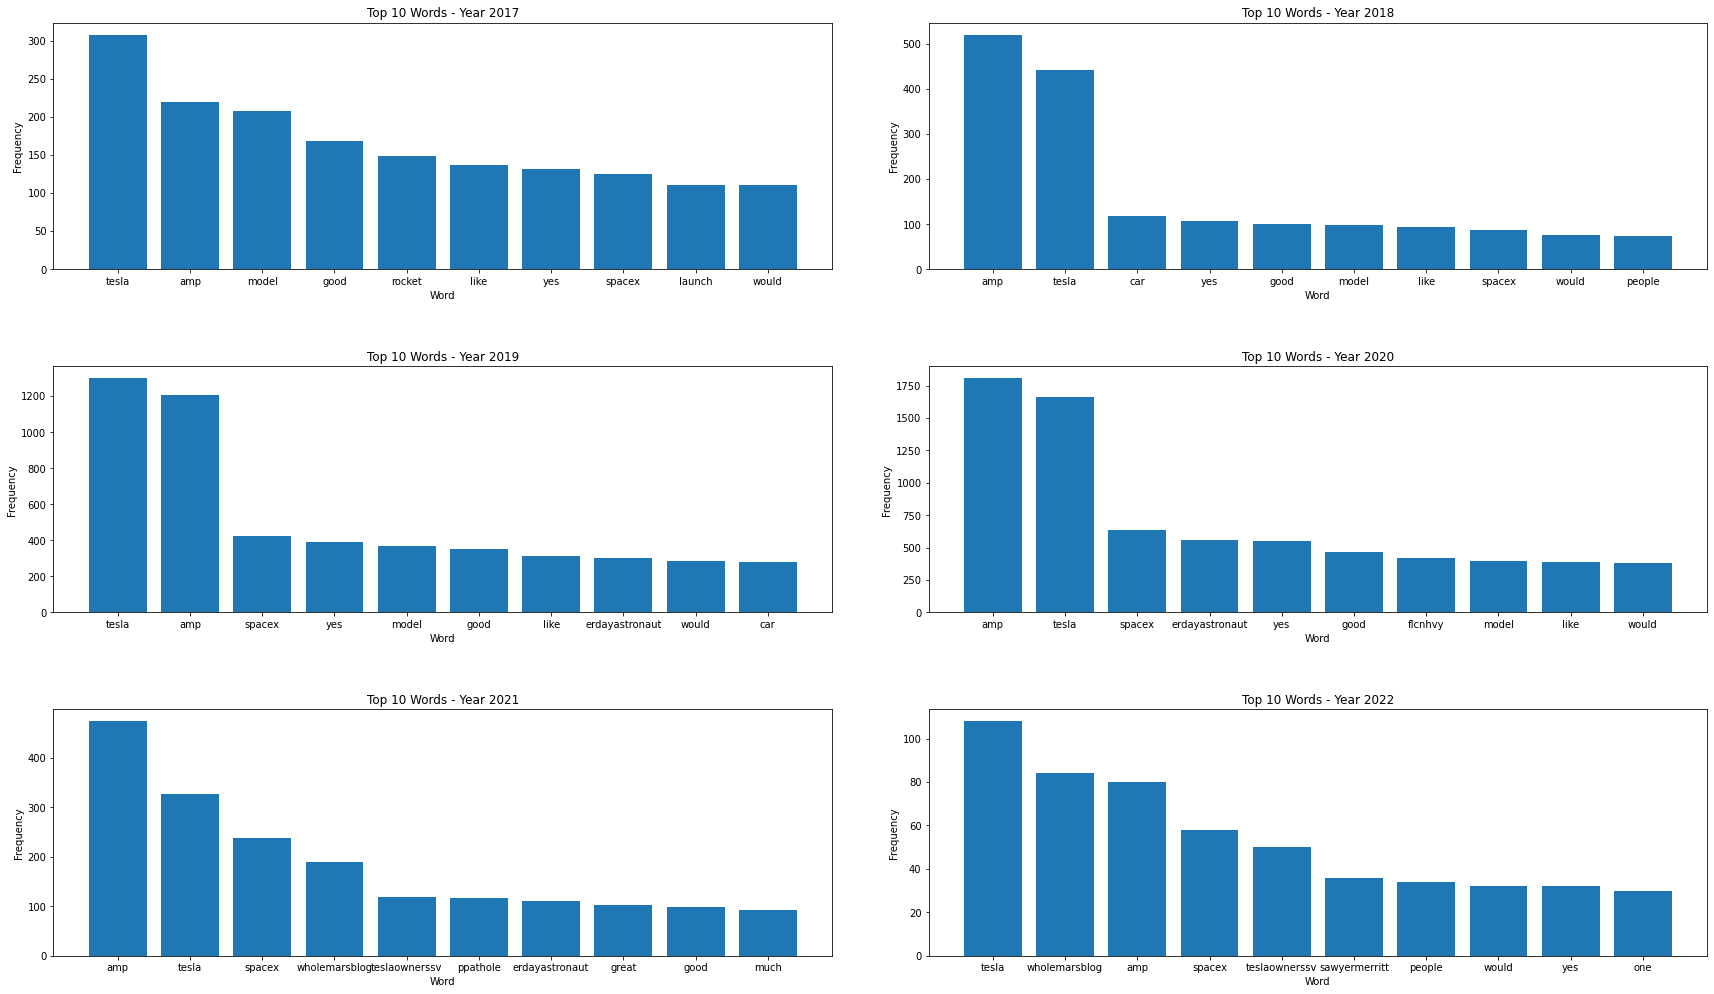

In [102]:
plt.figure(figsize=(25,15))

#Plot 1

plt.subplot(3,2,1)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar( top_10_2017['Word'],top_10_2017['Frequency'])
plt.title('Top 10 Words - Year 2017')

#Plot 2
plt.subplot(3,2,2)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar( top_10_2018['Word'],top_10_2018['Frequency'])
plt.title('Top 10 Words - Year 2018')

#Plot 3
plt.subplot(3,2,3)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar( top_10_2019['Word'],top_10_2019['Frequency'])
plt.title('Top 10 Words - Year 2019')

#Plot 4
plt.subplot(3,2,4)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar( top_10_2020['Word'],top_10_2020['Frequency'])
plt.title('Top 10 Words - Year 2020')

#Plot 5
plt.subplot(3,2,5)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar( top_10_2021['Word'],top_10_2021['Frequency'])
plt.title('Top 10 Words - Year 2021')

#Plot 5
plt.subplot(3,2,6)
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.bar( top_10_2022['Word'],top_10_2022['Frequency'])
plt.title('Top 10 Words - Year 2022')

plt.tight_layout(pad=5)

# log-log plots of word frequencies and rank for each year

In [103]:
#Please excuse variable names, the data in below dataframes is for all words, not just Top 10
top_10_2017 = word_frequency(2017)
top_10_2018 = word_frequency(2018)
top_10_2019 = word_frequency(2019)
top_10_2020 = word_frequency(2020)
top_10_2021 = word_frequency(2021)
top_10_2022 = word_frequency(2022)

<FreqDist with 7006 samples and 42073 outcomes>
<FreqDist with 6202 samples and 33761 outcomes>
<FreqDist with 12272 samples and 108519 outcomes>
<FreqDist with 14611 samples and 149840 outcomes>
<FreqDist with 5812 samples and 35632 outcomes>
<FreqDist with 1743 samples and 9850 outcomes>


In [104]:
top_10_2017["Rank"] = top_10_2017["Frequency"].rank(ascending=False)
top_10_2018["Rank"] = top_10_2018["Frequency"].rank(ascending=False)
top_10_2019["Rank"] = top_10_2019["Frequency"].rank(ascending=False)
top_10_2020["Rank"] = top_10_2020["Frequency"].rank(ascending=False)
top_10_2021["Rank"] = top_10_2021["Frequency"].rank(ascending=False)
top_10_2022["Rank"] = top_10_2022["Frequency"].rank(ascending=False)

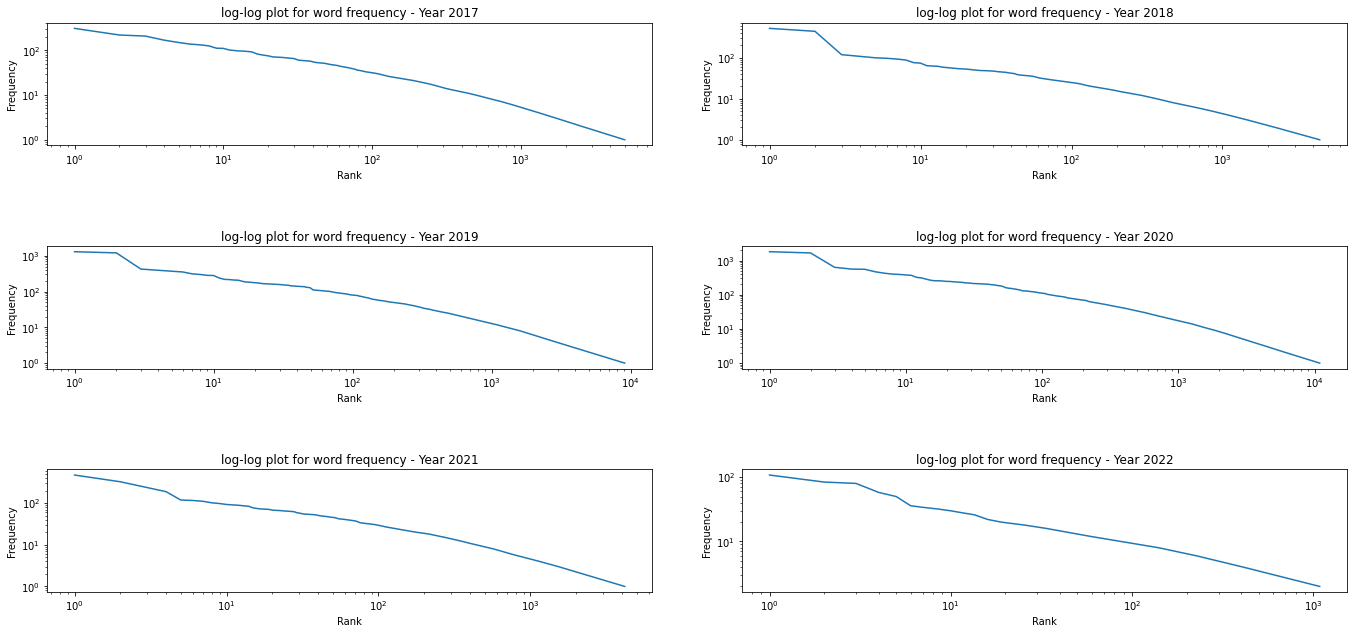

In [105]:
plt.figure(figsize=(20,10))

#Plot 1

plt.subplot(3,2,1)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.loglog( top_10_2017['Rank'],top_10_2017['Frequency'])
plt.title('log-log plot for word frequency - Year 2017')

#Plot 2
plt.subplot(3,2,2)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.loglog( top_10_2018['Rank'],top_10_2018['Frequency'])
plt.title('log-log plot for word frequency - Year 2018')

#Plot 3
plt.subplot(3,2,3)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.loglog( top_10_2019['Rank'],top_10_2019['Frequency'])
plt.title('log-log plot for word frequency - Year 2019')

#Plot 4
plt.subplot(3,2,4)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.loglog( top_10_2020['Rank'],top_10_2020['Frequency'])
plt.title('log-log plot for word frequency - Year 2020')

#Plot 5
plt.subplot(3,2,5)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.loglog( top_10_2021['Rank'],top_10_2021['Frequency'])
plt.title('log-log plot for word frequency - Year 2021')

#Plot 5
plt.subplot(3,2,6)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.loglog( top_10_2022['Rank'],top_10_2022['Frequency'])
plt.title('log-log plot for word frequency - Year 2022')

plt.tight_layout(pad=5)

#bigram network graphs

In [106]:
def remove_url(txt):
    url_patt = re.compile(r'https?://\S+|www\.\S+')
    no__url = url_patt.sub(r'', txt)
    return no__url

In [107]:
list = []
del list

In [108]:
def find_bigrams(year, top_bigrams = 100):
    if year == 2017:
      data = year_2017
    elif year == 2018:
      data = year_2018
    elif year == 2019:
      data = year_2019
    elif year == 2020:
      data = year_2020
    elif year == 2021:
      data = year_2021
    elif year == 2022:
      data = year_2022
    else:
      return "Invalid Year"
    tweets_withno_urls = [remove_url(tweet) for tweet in data['tweet']]
    words_intweet = [tweet.lower().split() for tweet in tweets_withno_urls]
    tweets_no_sw = [[word for word in tweet_words if not word in stopword_list] for tweet_words in words_intweet]
    term_bigram = [list(bigrams(tweet)) for tweet in tweets_no_sw]
    bigrams_list = list(itertools.chain(*term_bigram))
    bigram_counts = collections.Counter(bigrams_list)
    #return bigram_counts
    bigram_counts.most_common(top_bigrams)
    bigram_df = pd.DataFrame(bigram_counts.most_common(100),columns=['bigram', 'count'])
    bigram_df["year"] = str(year)
    bigram_df.reset_index()
    return bigram_df

In [109]:
bigram_df_final = pd.DataFrame(columns=['bigram','count','year'])
years = [2017,2018,2019,2020,2021,2022]
for i in years:
  df = find_bigrams(i,top_bigrams = 100)  
  bigram_df_final = bigram_df_final.append(df)

In [110]:
bigram_df_final

,bigram,count,year
0,"(model, 3)",50,2017
1,"(falcon, 9)",41,2017
2,"(model, x)",29,2017
3,"(tesla, model)",22,2017
4,"(space, station)",20,2017
...,...,...,...
95,"(@wholemarsblog, tesla)",4,2022
96,"(@wholemarsblog, yup)",4,2022
97,"(@limitingthe, @baglino)",4,2022
98,"(@baglino, manganese)",4,2022


# Visualization


In [111]:
def bigram_viz(year):
    if year == 2017:
      data = bigram_df_final[bigram_df_final['year'] == '2017']
    elif year == 2018:
      data = bigram_df_final[bigram_df_final['year'] == '2018']
    elif year == 2019:
      data = bigram_df_final[bigram_df_final['year'] == '2019']
    elif year == 2020:
      data = bigram_df_final[bigram_df_final['year'] == '2020']
    elif year == 2021:
      data = bigram_df_final[bigram_df_final['year'] == '2021']
    elif year == 2022:
      data = bigram_df_final[bigram_df_final['year'] == '2022']
    else:
      return "Invalid Year"
    
    d = data.set_index('bigram').T.to_dict('records')
    G = nx.Graph()

# Create connections between nodes so that it can be plotted over graph
    for k, v in d[0].items():
      G.add_edge(k[0], k[1], weight=(v * 10))

    fig, ax = plt.subplots(figsize=(25, 15))

    pos = nx.spring_layout(G, k=2)

  # Plot networks with nodes and edges
    nx.draw_networkx(G, pos,
                 font_size=16,
                 width=3,
                 edge_color='grey',
                 node_color='red',
                 with_labels = False,
                 ax=ax)

  # Create offset labels which overlay over graphs
    for key, value in pos.items():
      x, y = value[0]+.05, value[1]+.045
      ax.text(x, y,
            s=key,
            bbox=dict(facecolor='green', alpha=0.25),
            horizontalalignment='center', fontsize=13)
    plt.title("Bigram Network Graph for 2017 (Top 100)")
    plt.show()

### Year - 2017

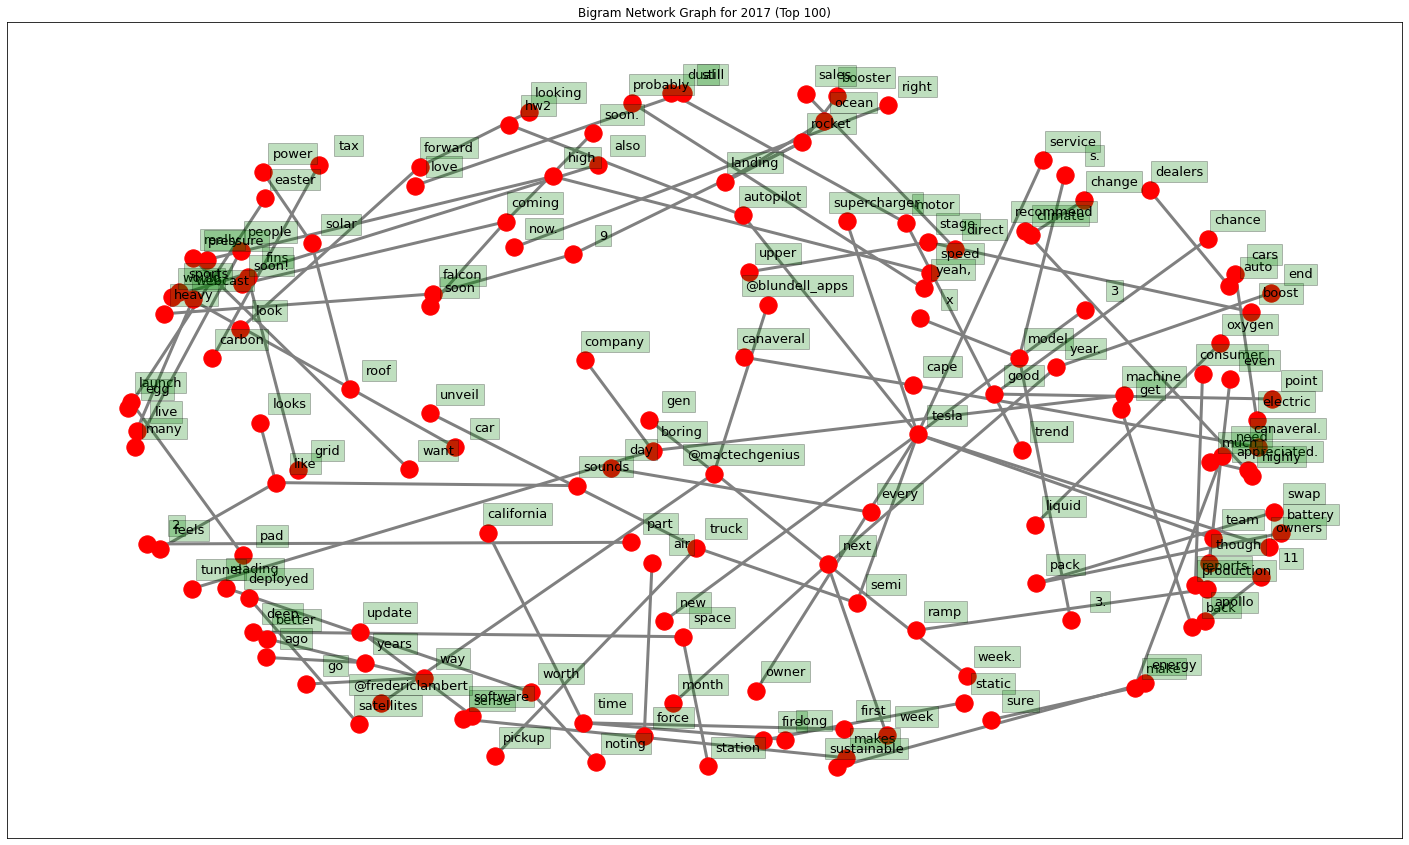

In [112]:
bigram_viz(2017)

### Year - 2018

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128760 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128760 missing from current font.
  font.set_text(s, 0, flags=flags)


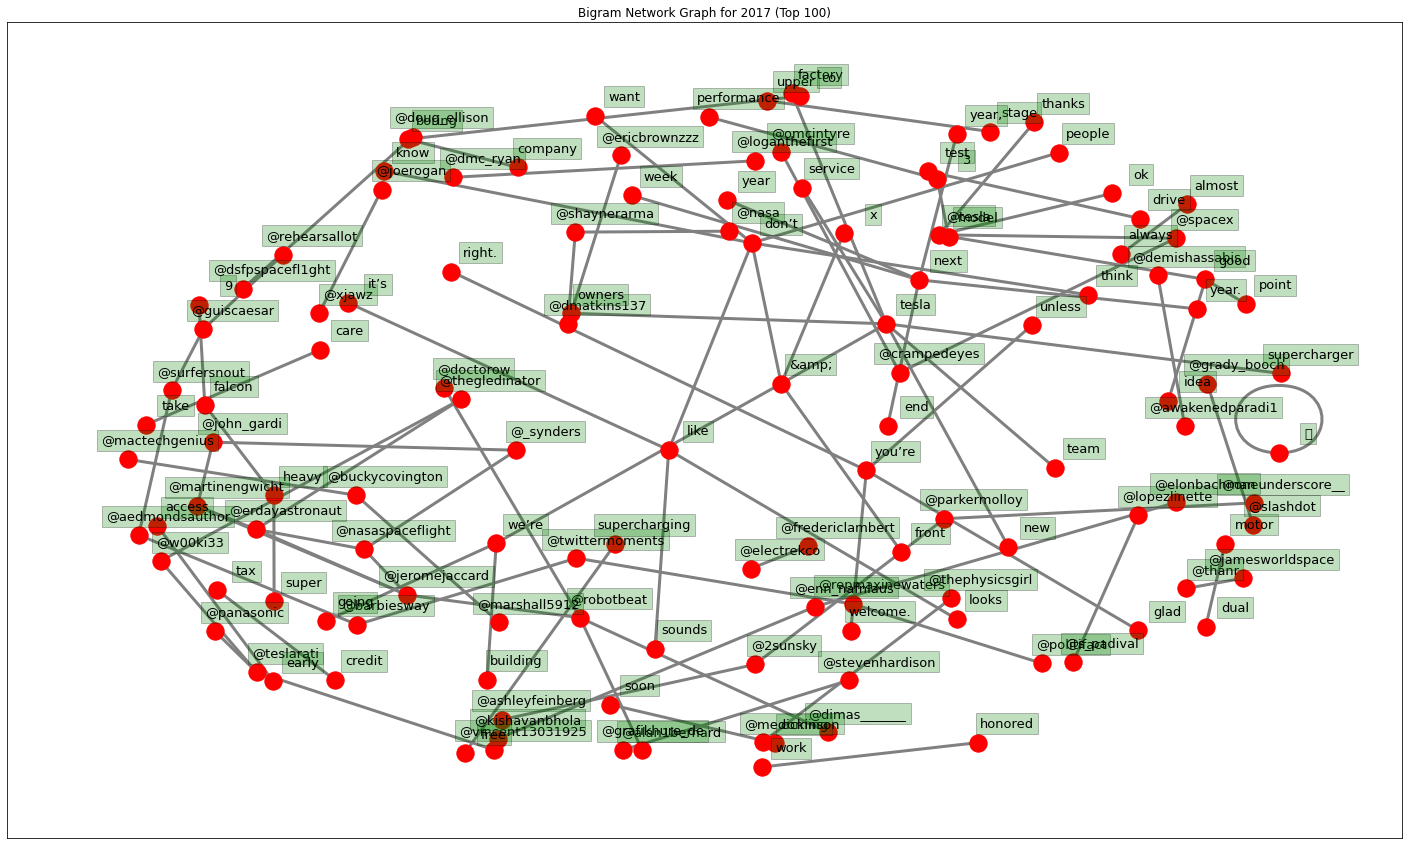

In [113]:
bigram_viz(2018)

### Year - 2019

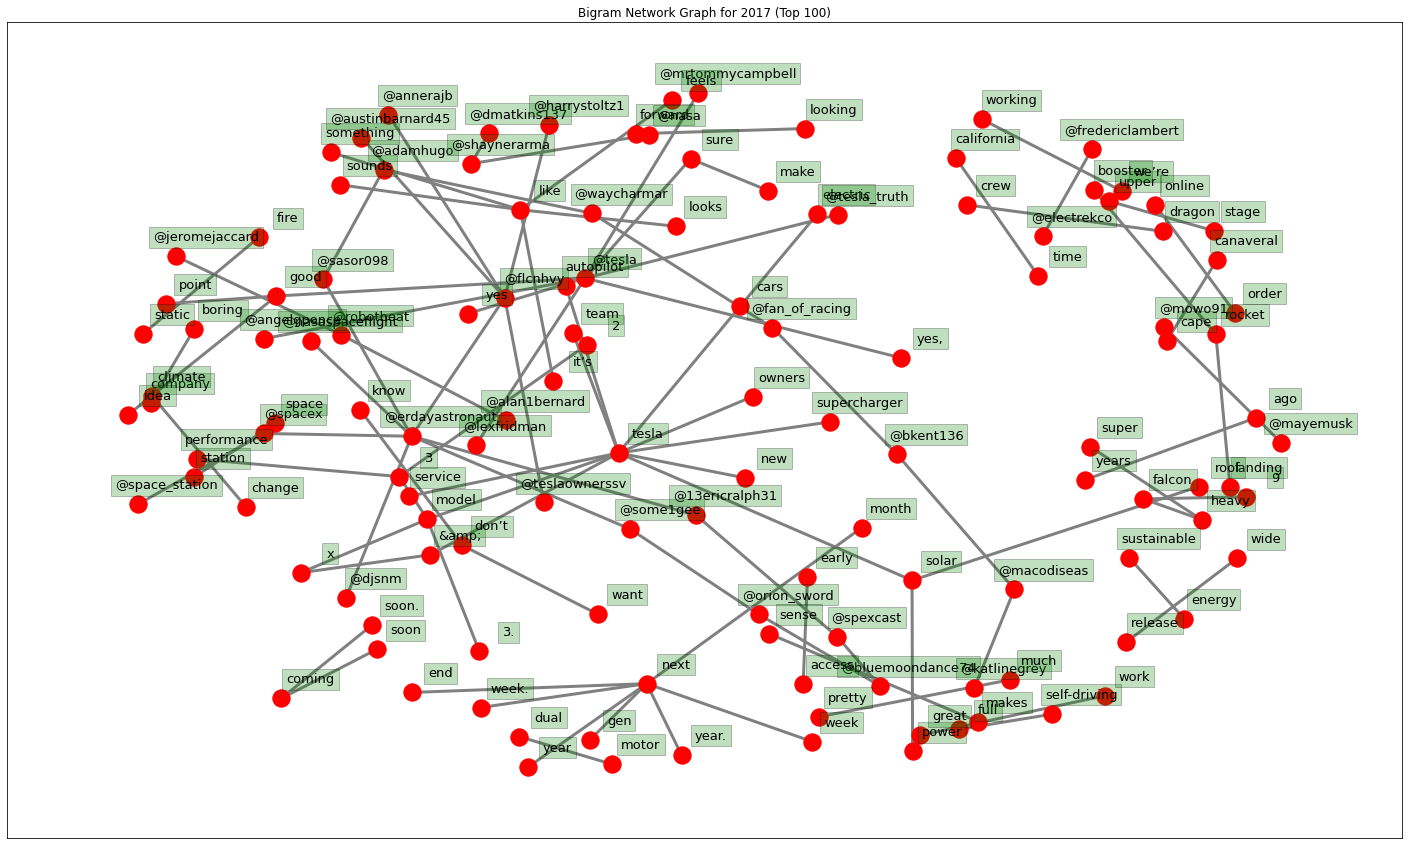

In [114]:
bigram_viz(2019)

### Year - 2020

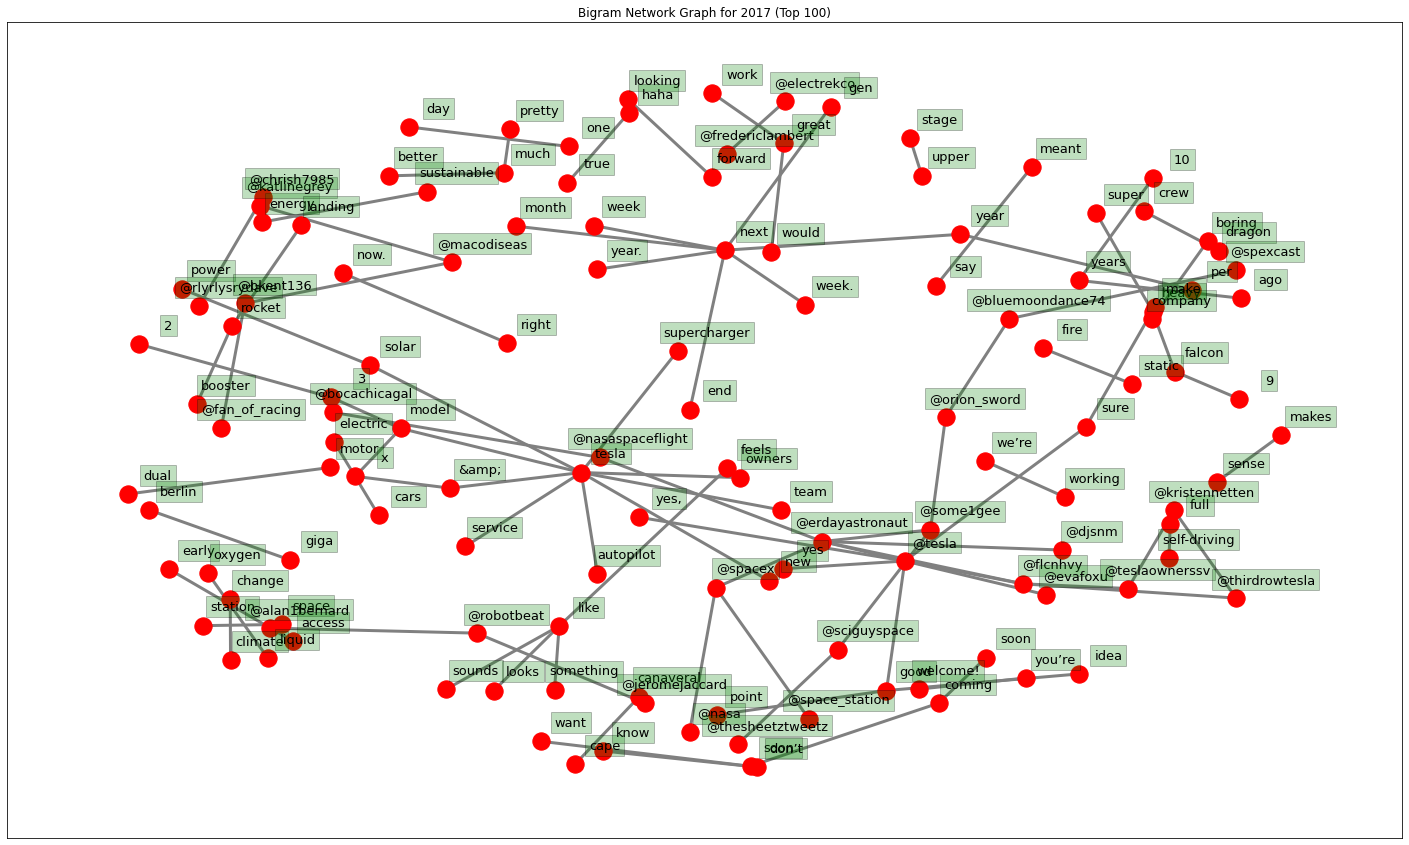

In [115]:
bigram_viz(2020)

### Year - 2021

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129315 missing from current font.
  font.set_text(s, 0, flags=flags)


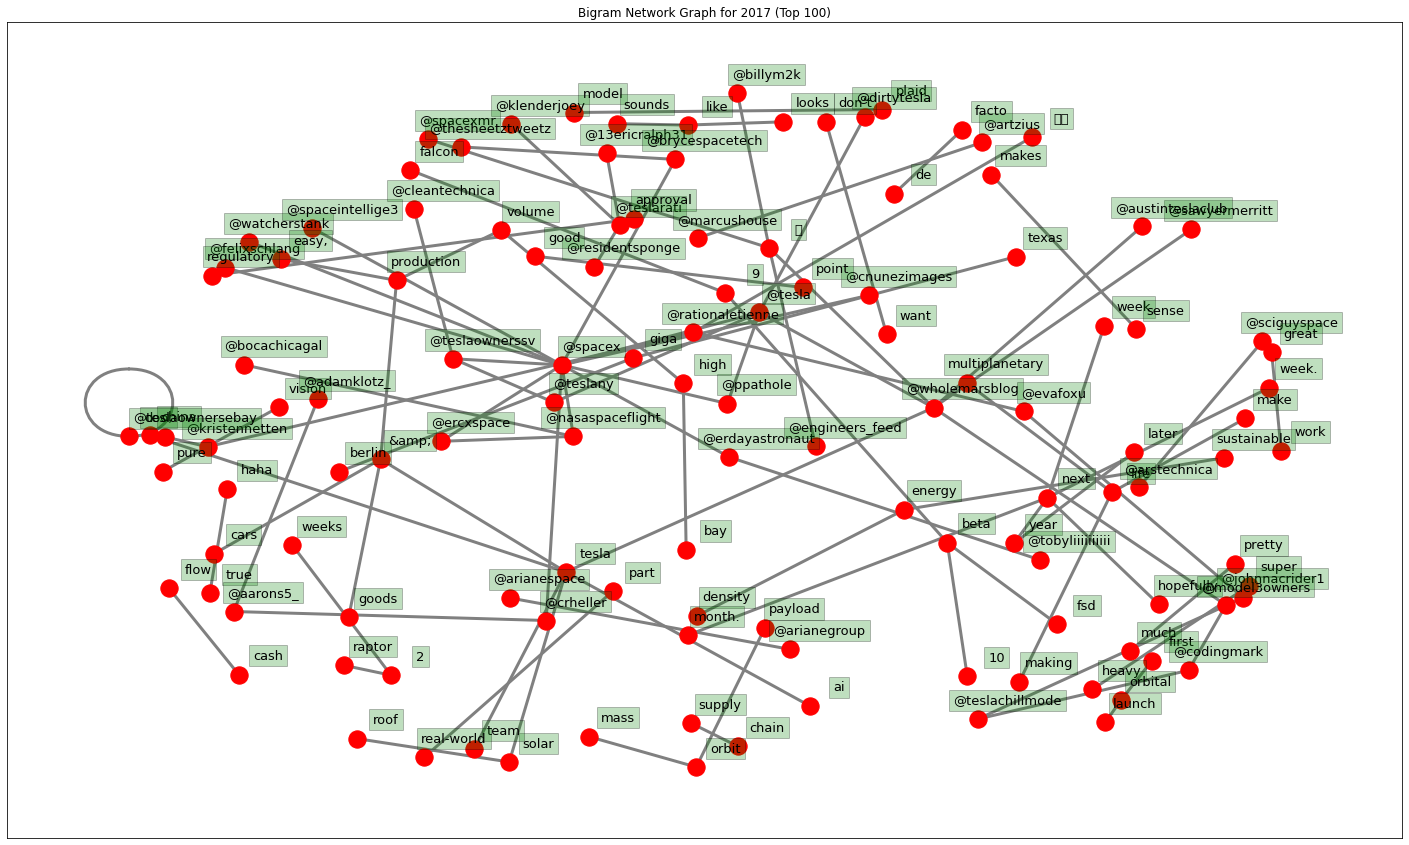

In [116]:
bigram_viz(2021)

### Year - 2022

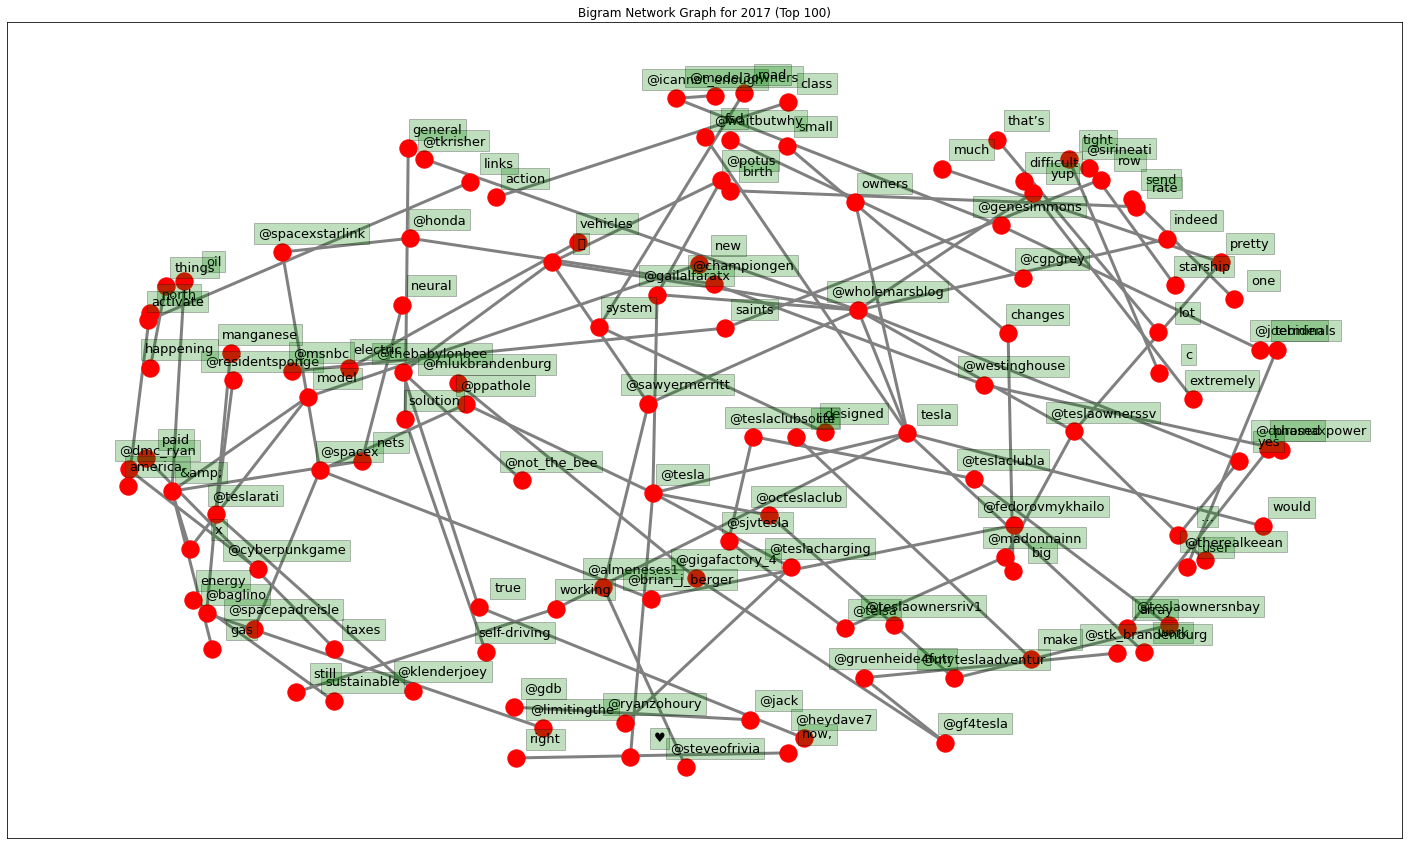

In [117]:
bigram_viz(2022)

# Export to HTML

In [119]:
!jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/FDA/Project 3/Project3_Group79.ipynb'
#<script src="https://cdn.plot.ly/plotly-latest.min.js"></script>

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/FDA/Project 3/Project3_Group79.ipynb to html
[NbConvertApp] Writing 3417580 bytes to /content/drive/MyDrive/Colab Notebooks/FDA/Project 3/Project3_Group79.html
